# Time series for machine learning

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
apple = pd.read_csv("apple2.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2009,12.268572,13.005714,12.165714,12.964286,11.223147,186503800
1,1/5/2009,13.310000,13.740000,13.244286,13.511429,11.696809,295402100
2,1/6/2009,13.707143,13.881429,13.198571,13.288571,11.503882,322327600
3,1/7/2009,13.115714,13.214286,12.894286,13.001429,11.255305,188262200
4,1/8/2009,12.918571,13.307143,12.862857,13.242857,11.464305,168375200


In [19]:
data = apple[['Date','Adj Close']]
data2 = apple[['Date','Open']]
print(data.head())

       Date  Adj Close
0  1/2/2009  11.223147
1  1/5/2009  11.696809
2  1/6/2009  11.503882
3  1/7/2009  11.255305
4  1/8/2009  11.464305


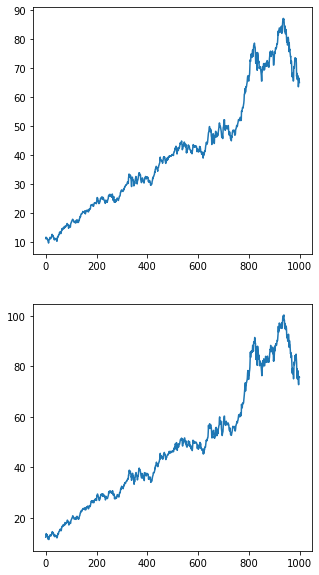

In [12]:
import matplotlib.pyplot as plt

# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='Adj Close', ax=axs[0])
data2.iloc[:1000].plot(y='Open', ax=axs[1])
plt.show()

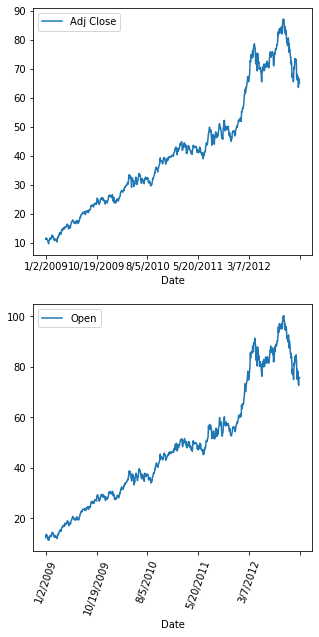

In [26]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x='Date',y='Adj Close', ax=axs[0])
data2.iloc[:1000].plot(x='Date',y='Open', ax=axs[1])
degrees = 70
plt.xticks(rotation=degrees)
plt.show()

# Machine learning
For fun try to predict volume given daily high, low and adjusted close

In [27]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = apple[['High', 'Low','Adj Close']]
y = apple[['Volume']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

C:\Users\blake\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\blake\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Make target column to predict

In [35]:
targets = {'High':  [13.9 ,14.2,15.4,14.7],'Low': [11.5,12.3,13.4,11.2],'Adj Close': [12.5,13.4,14.4,12.2]}
targets = pd.DataFrame(targets, columns = ['High', 'Low','Adj Close'])
targets.head()

,High,Low,Adj Close
0,13.9,11.5,12.5
1,14.2,12.3,13.4
2,15.4,13.4,14.4
3,14.7,11.2,12.2


[186503800 186503800 186503800 186503800]


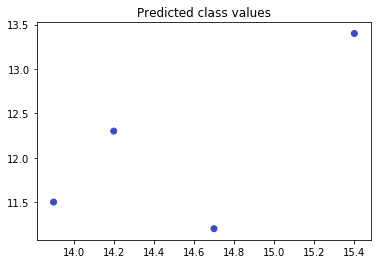

In [45]:
# Create input array
X_predict = targets[['High', 'Low','Adj Close']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['High'], X_predict['Low'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

# Fitting Regression

In [3]:
boston = pd.read_csv("boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [48]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = boston[['AGE']]
y = boston[['RM']]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

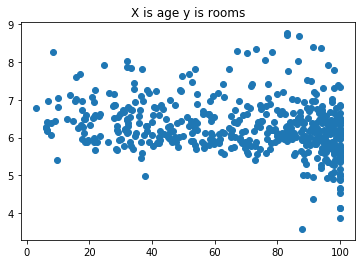

In [52]:
# Visualize predictions and actual values
plt.scatter(boston['AGE'], boston['RM'])
plt.title("X is age y is rooms")
plt.show()

In [66]:
new_inputs = np.array([2.95626595,    3.88080808,    4.86161616,    5.84242424,
          6.82323232,    7.8040404 ,    8.78484848,    9.76565657,
         10.74646465,   11.72727273,   12.70808081,   13.68888889,
         14.66969697,   15.65050505,   16.63131313,   17.61212121,
         18.59292929,   19.57373737,   20.55454545,   21.53535354,
         22.51616162,   23.4969697 ,   24.47777778,   25.45858586,
         26.43939394,   27.42020202,   28.4010101 ,   29.38181818,
         30.36262626,   31.34343434,   32.32424242,   33.30505051,
         34.28585859,   35.26666667,   36.24747475,   37.22828283,
         38.20909091,   39.18989899,   40.17070707,   41.15151515,
         42.13232323,   43.11313131,   44.09393939,   45.07474747,
         46.05555556,   47.03636364,   48.01717172,   48.9979798 ,
         49.97878788,   50.95959596,   51.94040404,   52.92121212,
         53.9020202 ,   54.88282828,   55.86363636,   56.84444444,
         57.82525253,   58.80606061,   59.78686869,   60.76767677,
         61.74848485,   62.72929293,   63.71010101,   64.69090909,
         65.67171717,   66.65252525,   67.63333333,   68.61414141,
         69.59494949,   70.57575758,   71.55656566,   72.53737374,
         73.51818182,   74.4989899 ,   75.47979798,   76.46060606,
         77.44141414,   78.42222222,   79.4030303 ,   80.38383838,
         81.36464646,   82.34545455,   83.32626263,   84.30707071,
         85.28787879,   86.26868687,   87.24949495,   88.23030303,
         89.21111111,   90.19191919,   91.17272727,   92.15353535,
         93.13434343,   94.11515152,   95.0959596 ,   96.07676768,
         97.05757576,   98.03838384,   99.01919192,  100.24585556])


Reshape your data either X.reshape(-1, 1) if your data has a single feature/column and X.reshape(1, -1) if it contains a single sample. If you are getting this error then in this video, I plan to demystify the confusion surrounding numpy reshape (1,-1) function.

I'll use a simple example to explain what does -1 mean in numpy reshape.

reshape(-1,1) makes array into column

In [68]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape(-1, 1))

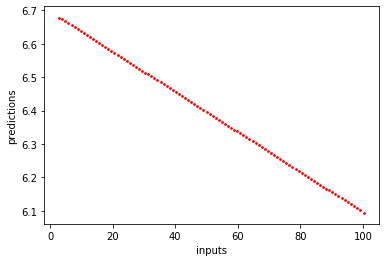

In [69]:
# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

# Working with heart beat sounds data in wav files

In [5]:
from glob import glob
audio_files = glob('C:/Users/blake/Desktop/453_923_bundle_archive/set_a/*.wav')
print(audio_files)

['C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201012172012.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201105040918.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201105041959.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201105051017.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201105060108.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201105061143.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201105190800.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201105280851.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201106010559.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201106010602.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201106021541.wav', 'C:/Users/blake/Desktop/453_923_bundle_archive/set_a\\artifact__201106030612.wav', 'C:

In [7]:
!pip install librosa
import librosa as lr


C:\Users\blake\anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\blake\anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# You can load in the wave file like this as well individually

audio, sfreq = lr.load('C:/Users/blake/Desktop/453_923_bundle_archive/set_a/murmur__201101051104.wav') <br>

print(sfreq) # This lets you know the sampling frequency so ther eis 202050 samples per second <br>

In [8]:
# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

Create an array of indices one for each sample and divide by sample frequency <br>m
indices = np.arange(0,len(audio)) <br>

time = indices / sfreq <br>

Or you can calculate the final timepoint of audio data using this <br>
 Create time array <br>
 final_time = (len(audio) - 1) / sfreq <br>
 time = np.linspace(0, final_time, sfreq)

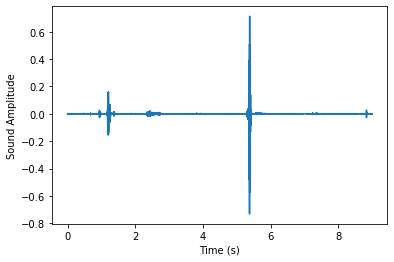

In [92]:
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

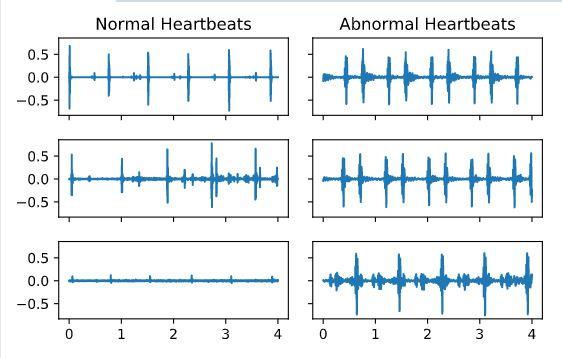

# New York Stock Exchange 
Regression

In [13]:
stock = pd.read_csv("prices.csv")
stock = stock[["date","symbol","close","volume"]]
stock.head()

,date,symbol,close,volume
0,2016-01-05 00:00:00,WLTW,125.839996,2163600.0
1,2016-01-06 00:00:00,WLTW,119.980003,2386400.0
2,2016-01-07 00:00:00,WLTW,114.949997,2489500.0
3,2016-01-08 00:00:00,WLTW,116.620003,2006300.0
4,2016-01-11 00:00:00,WLTW,114.970001,1408600.0


In [15]:
stock.dtypes

date       object
symbol     object
close     float64
volume    float64
dtype: object

 # Convert column to time series

In [16]:
stock['date'] = pd.to_datetime(stock['date'])
stock['close'] = stock['close'].astype(int)
stock['volume'] = stock['volume'].astype(int)


In [17]:
stock2 = stock[(stock.symbol == "A") | (stock.symbol == "AAL") | (stock.symbol == "AAP") | (stock.symbol == "AAPL") | (stock.symbol == "ABC")]
stock2

,date,symbol,close,volume
251,2010-01-04,A,31,3815500
252,2010-01-04,AAL,4,9837300
253,2010-01-04,AAP,40,1701700
254,2010-01-04,AAPL,214,123432400
255,2010-01-04,ABC,26,2455900
...,...,...,...,...
850764,2016-12-30,A,45,1216100
850765,2016-12-30,AAL,46,4495000
850766,2016-12-30,AAP,169,489300
850767,2016-12-30,AAPL,115,30586300


In [18]:
data = stock2.pivot(index='date', columns='symbol', values='close')
data.head()

symbol,A,AAL,AAP,AAPL,ABC
date,,,,,
2010-01-04,31,4,40,214,26
2010-01-05,30,5,40,214,26
2010-01-06,30,5,40,210,26
2010-01-07,30,5,40,210,25
2010-01-08,30,5,40,211,26


In [19]:
list(data.columns)

['A', 'AAL', 'AAP', 'AAPL', 'ABC']

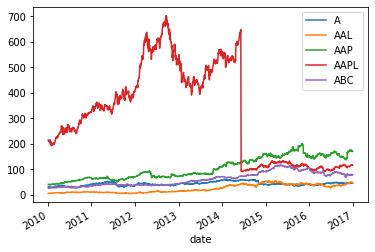

In [20]:
# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

# Introducing dataset

In [21]:
stock3 = stock[(stock.symbol == "A") | (stock.symbol == "AAL")]
prices = stock3.pivot(index='date', columns='symbol', values='close')
prices.head()

symbol,A,AAL
date,,
2010-01-04,31,4
2010-01-05,30,5
2010-01-06,30,5
2010-01-07,30,5
2010-01-08,30,5


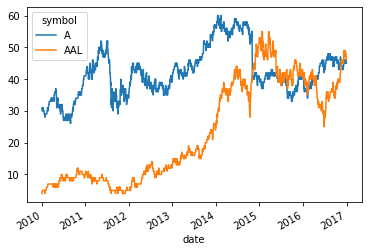

In [22]:
# Plot the raw values over time
prices.plot()
plt.show()

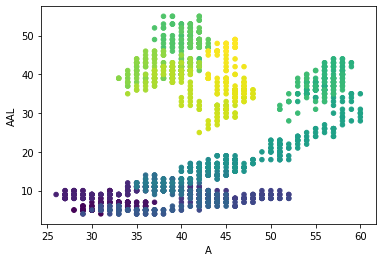

In [24]:
# Scatterplot with color relating to time
prices.plot.scatter('A', 'AAL', c=prices.index, 
                    cmap=plt.cm.viridis, colorbar=False)
plt.show()

# Using many companies to predict another!

In [25]:
all_prices = data # assign dataset

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[['AAL', 'AAP', 'AAPL']]
y = all_prices[['A']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[ -0.25211585  -0.15851146 -23.11990077]


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-1.4650654580829752


In [ ]:
# Visualize our predictions along with the "true" values, and print the score
# Plot the raw values over time

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

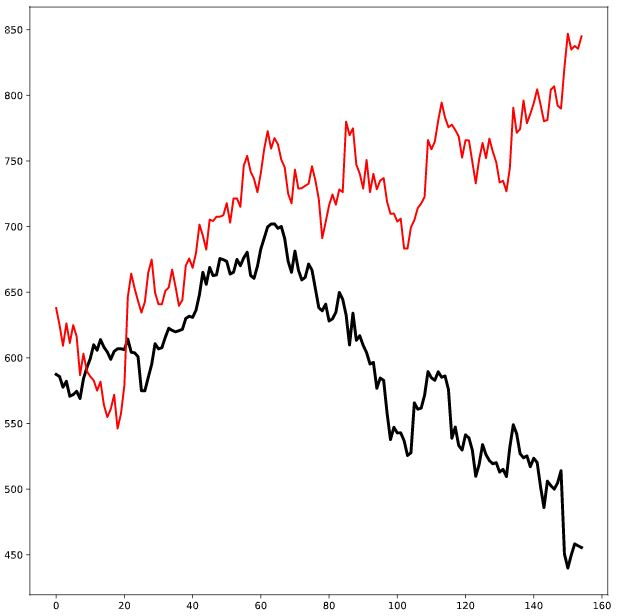

# Interpolation

In [36]:
prices2 = stock[(stock.symbol == "AIG")] 
prices2 = prices2.pivot(index='date', columns='symbol', values='close')
prices2.head()

symbol,AIG
date,
2010-01-04,29
2010-01-05,29
2010-01-06,29
2010-01-07,28
2010-01-08,29


In [40]:
prices2.shape

(1762, 1)

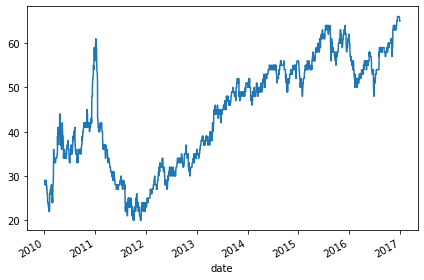

In [39]:
# Visualize the dataset
prices2.plot(legend=False)
plt.tight_layout()
plt.show()

# Create Missing data!

In [41]:
prices2.iloc[1000:1300] = np.nan

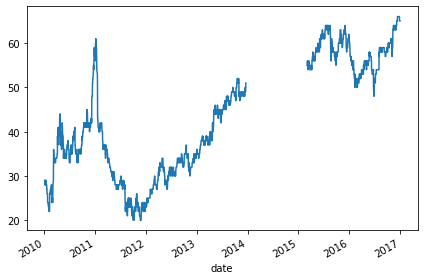

In [42]:
# Visualize the dataset
prices2.plot(legend=False)
plt.tight_layout()
plt.show()

In [44]:
# Calculate missing data!
missing = prices2.isna().sum()
missing

symbol
AIG    300
dtype: int64

# Create missing for multiple

In [65]:
prices3 = stock[(stock.symbol == "A") | (stock.symbol == "AAL") | (stock.symbol == "AAP") | (stock.symbol == "ABC")]

prices3 = prices3.pivot(index='date', columns='symbol', values='close')
prices3.head()

symbol,A,AAL,AAP,ABC
date,,,,
2010-01-04,31,4,40,26
2010-01-05,30,5,40,26
2010-01-06,30,5,40,26
2010-01-07,30,5,40,25
2010-01-08,30,5,40,26


In [66]:
prices3['A'].iloc[1000:1300] = np.nan
prices3['AAL'].iloc[700:1000] = np.nan
prices3['AAP'].iloc[100:400] = np.nan
prices3['ABC'].iloc[1200:1500] = np.nan
missing# Calculate missing data!
missing = prices3.isna().sum()
missing

C:\Users\blake\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


symbol
A      300
AAL    300
AAP    300
ABC    300
dtype: int64

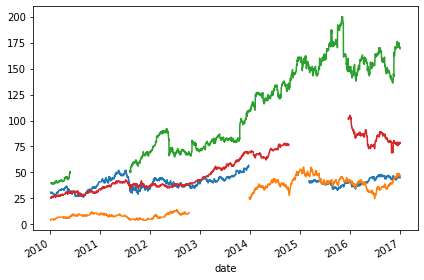

In [67]:
# Visualize the dataset
prices3.plot(legend=False)
plt.tight_layout()
plt.show()

In [68]:
prices = prices3 # Rename

In [69]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

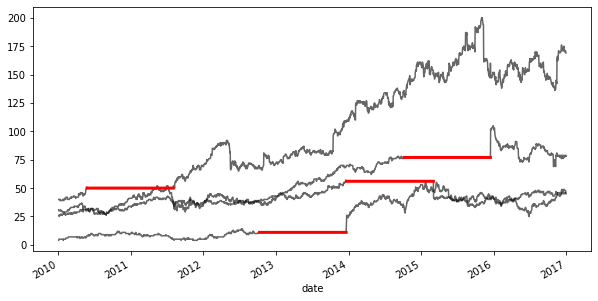

In [70]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

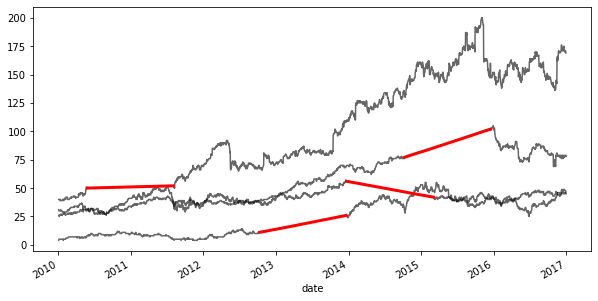

In [71]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

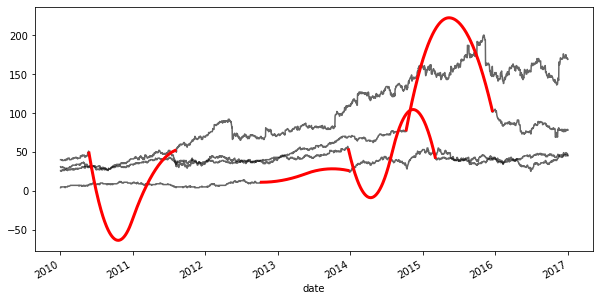

In [72]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

# Transforming raw data
define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

In [74]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change


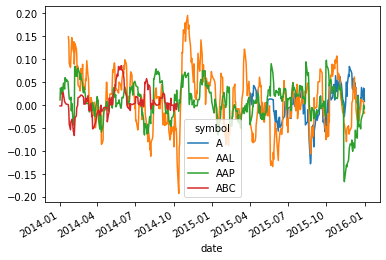

In [75]:
# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

# Handling outliers
handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.
Define a function that takes an input series and does the following:
Calculates the absolute value of each datapoint's distance from the series mean, then creates a boolean mask for datapoints that are three times the standard deviation from the mean.

In [76]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))

    # Calculate a mask for the differences that are > 3 standard deviations from the mean
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series


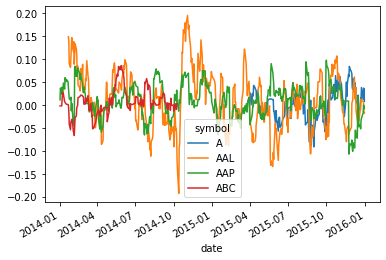

In [77]:
# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

# Engineering multiple rolling features at once
Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate. Define a list consisting of four features you will calculate: the minimum, maximum, mean, and standard deviation (in that order).
Using the rolling window (prices_perc_rolling) we defined for you, calculate the features from features_to_calculate.
Plot the results over time, along with the original time series using the given code.

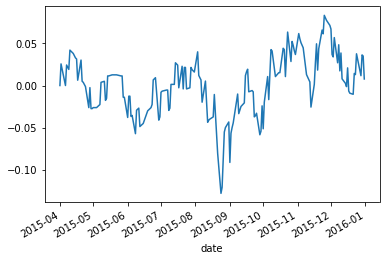

In [81]:
prices1 = prices['A']
# Apply your custom function and plot
prices_perc1 = prices1.rolling(20).apply(percent_change)
prices_perc1.loc["2014":"2015"].plot()
plt.show()

In [82]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc1.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)


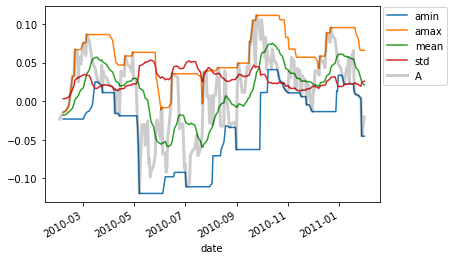

In [84]:
# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc1.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

# Percentiles and partial functions
In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same percentile() function in numpy

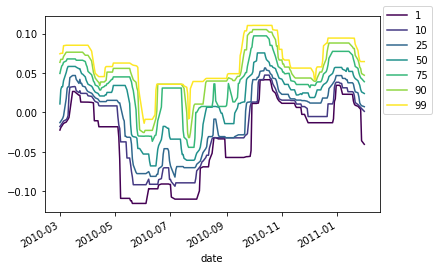

In [86]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc1.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

# Using "date" information
It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In this exercise, you'll extract these date/time based features. A single time series has been loaded in a variable called prices.

In [ ]:
# Extract date features from the data, add them as columns
prices_perc1['day_of_week'] = prices_perc1.index.dayofweek
prices_perc1['week_of_year'] = prices_perc1.index.weekofyear
prices_perc1['month_of_year'] = prices_perc1.index.month

# Print prices_perc
print(prices_perc1)

# Creating time-shifted features
In machine learning for time series, it's common to use information about previous time points to predict a subsequent time point.

In this exercise, you'll "shift" your raw data and visualize the results. You'll use the percent change time series that you calculated in the previous chapter, this time with a very short window. A short window is important because, in a real-world scenario, you want to predict the day-to-day fluctuations of a time series, not its change over a longer window of time."

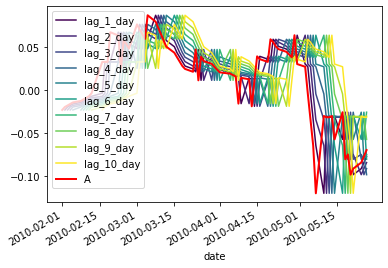

In [93]:
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc1.shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

# Plot the first 100 samples of each
ax = prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis)
prices_perc1.iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()

 # Special case: Auto-regressive models
Now that you've created time-shifted versions of a single time series, you can fit an auto-regressive model. This is a regression model where the input features are time-shifted versions of the output time series data. You are using previous values of a timeseries to predict current values of the same timeseries (thus, it is auto-regressive).

By investigating the coefficients of this model, you can explore any repetitive patterns that exist in a timeseries, and get an idea for how far in the past a data point is predictive of the future.

In [209]:
prices_perc1 = pd.DataFrame(prices_perc1)


In [210]:
df = pd.to_numeric(prices_perc1['A'], errors='coerce').convert_dtypes() 
prices_perc1 = pd.DataFrame(df)
prices_perc1.dtypes

A    Int32
dtype: object

In [211]:
prices_perc1['A'] = prices_perc1['A'].fillna(prices_perc1['A'].mean())


In [215]:
prices_perc1['A'] = prices_perc1['A'].astype(int)
prices_perc1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1763 entries, 2010-01-04 00:00:00 to day_of_week
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       1763 non-null   int32
dtypes: int32(1)
memory usage: 100.7+ KB


In [219]:
prices_perc_shifted['lag_1_day']= prices_perc_shifted['lag_1_day'].fillna(prices_perc_shifted['lag_1_day'].mean())
prices_perc_shifted['lag_2_day']= prices_perc_shifted['lag_2_day'].fillna(prices_perc_shifted['lag_2_day'].mean())
prices_perc_shifted['lag_3_day']= prices_perc_shifted['lag_3_day'].fillna(prices_perc_shifted['lag_3_day'].mean())
prices_perc_shifted['lag_4_day']= prices_perc_shifted['lag_4_day'].fillna(prices_perc_shifted['lag_4_day'].mean())
prices_perc_shifted['lag_5_day']= prices_perc_shifted['lag_5_day'].fillna(prices_perc_shifted['lag_5_day'].mean())
prices_perc_shifted['lag_6_day']= prices_perc_shifted['lag_6_day'].fillna(prices_perc_shifted['lag_6_day'].mean())
prices_perc_shifted['lag_7_day']= prices_perc_shifted['lag_7_day'].fillna(prices_perc_shifted['lag_7_day'].mean())
prices_perc_shifted['lag_8_day']= prices_perc_shifted['lag_8_day'].fillna(prices_perc_shifted['lag_8_day'].mean())
prices_perc_shifted['lag_9_day']= prices_perc_shifted['lag_9_day'].fillna(prices_perc_shifted['lag_9_day'].mean())
prices_perc_shifted['lag_10_day']= prices_perc_shifted['lag_10_day'].fillna(prices_perc_shifted['lag_10_day'].mean())

In [220]:
prices_perc_shifted.head()

,lag_1_day,lag_2_day,lag_3_day,lag_4_day,lag_5_day,lag_6_day,lag_7_day,lag_8_day,lag_9_day,lag_10_day
date,,,,,,,,,,
2010-01-04 00:00:00,0.005695,0.005703,0.00571,0.005714,0.005702,0.005687,0.005687,0.005669,0.00565,0.005645
2010-01-05 00:00:00,0.005695,0.005703,0.00571,0.005714,0.005702,0.005687,0.005687,0.005669,0.00565,0.005645
2010-01-06 00:00:00,0.005695,0.005703,0.00571,0.005714,0.005702,0.005687,0.005687,0.005669,0.00565,0.005645
2010-01-07 00:00:00,0.005695,0.005703,0.00571,0.005714,0.005702,0.005687,0.005687,0.005669,0.00565,0.005645
2010-01-08 00:00:00,0.005695,0.005703,0.00571,0.005714,0.005702,0.005687,0.005687,0.005669,0.00565,0.005645


In [221]:
# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc1.fillna(np.nanmedian(prices_perc1))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [226]:
prices_perc_shifted.columns

Index(['lag_1_day', 'lag_2_day', 'lag_3_day', 'lag_4_day', 'lag_5_day',
       'lag_6_day', 'lag_7_day', 'lag_8_day', 'lag_9_day', 'lag_10_day'],
      dtype='object')

In [222]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

In [ ]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:'2015-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1])
plt.show()

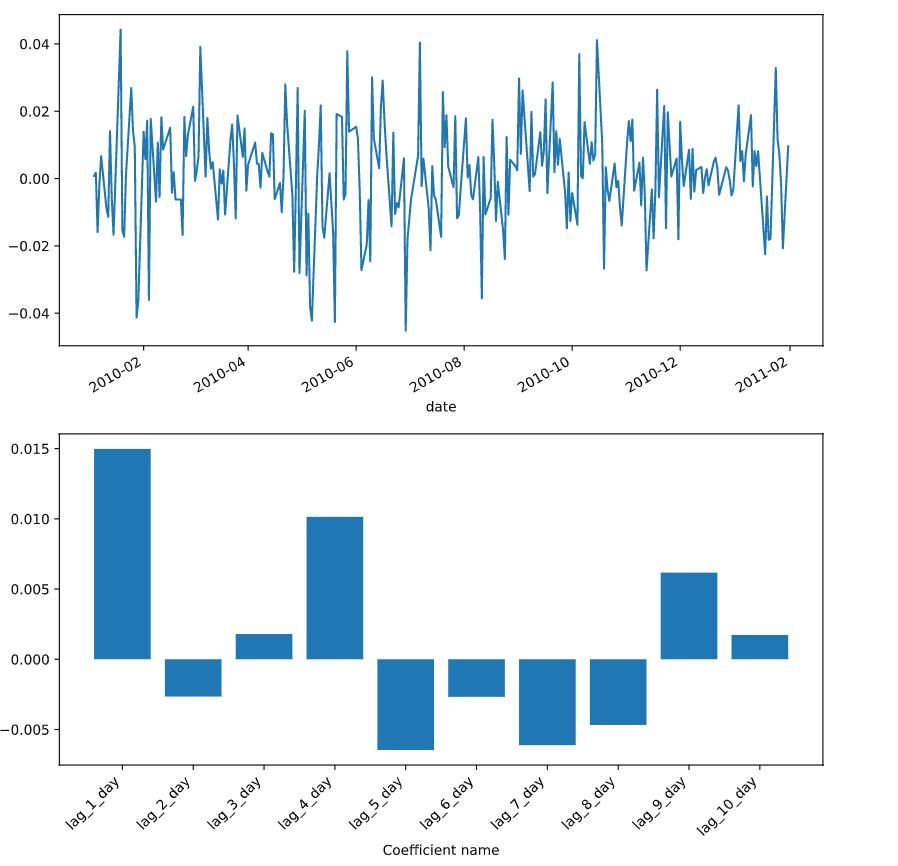

# Cross-validation with shuffling
As you'll recall, cross-validation is the process of splitting your data into training and test sets multiple times. Each time you do this, you choose a different training and test set. In this exercise, you'll perform a traditional ShuffleSplit cross-validation on the company value data from earlier. Later we'll cover what changes need to be made for time series data. The data we'll use is the same historical price data for several large companies.

An instance of the Linear regression object (model) is available in your workspace along with the function r2_score() for scoring. Also, the data is stored in arrays X and y. We've also provided a helper function (visualize_predictions()) to help visualize the results.

In [ ]:
# Import ShuffleSplit and create the cross-validation object
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])

    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X[tt])
    score = r2_score(y[tt], prediction)
    results.append((prediction, score, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

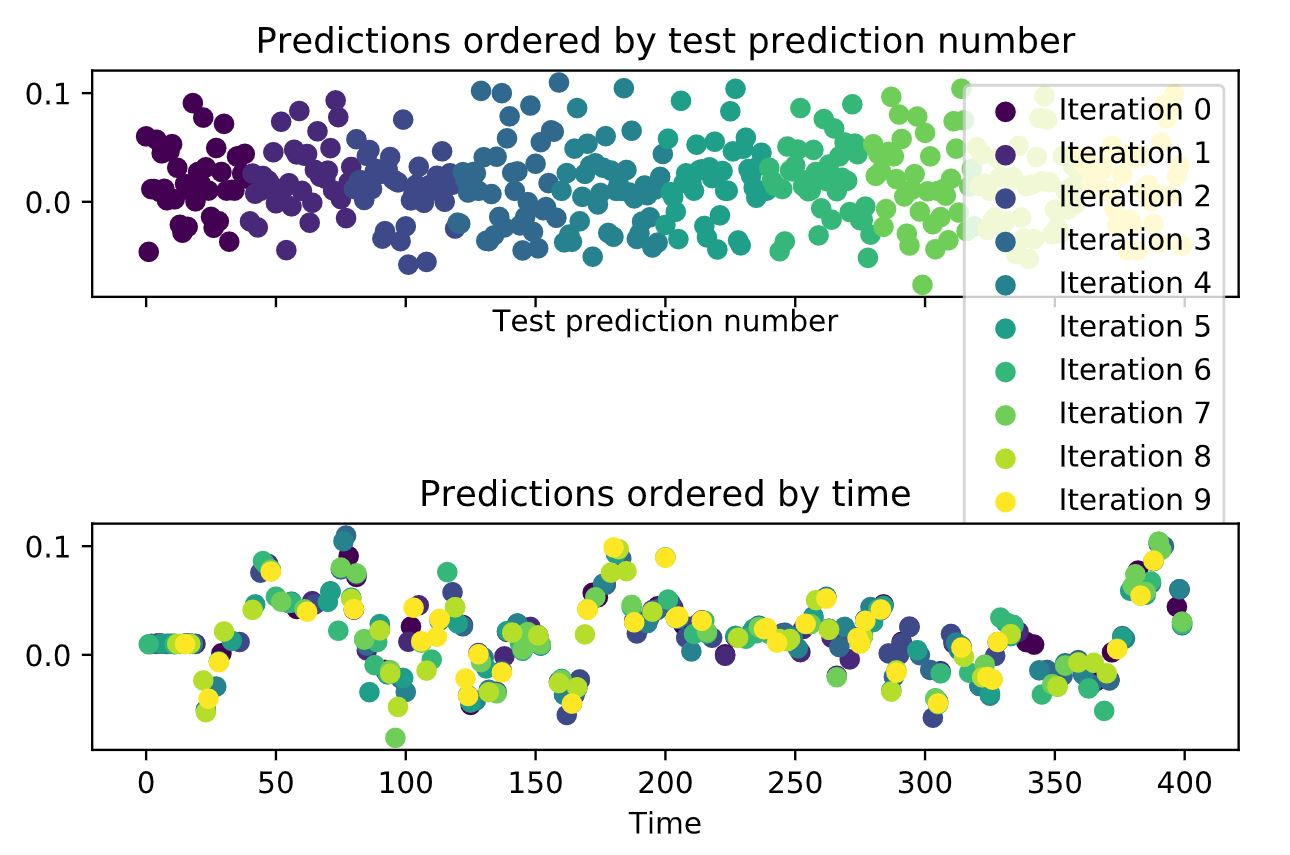

In [ ]:
# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X[tt])
    results.append((prediction, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

# Time-based cross-validation
Finally, let's visualize the behavior of the time series cross-validation iterator in scikit-learn. Use this object to iterate through your data one last time, visualizing the training data used to fit the model on each iteration.

An instance of the Linear regression model object is available in your workpsace. Also, the arrays X and y (training data) are available too.

In [ ]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr])

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()

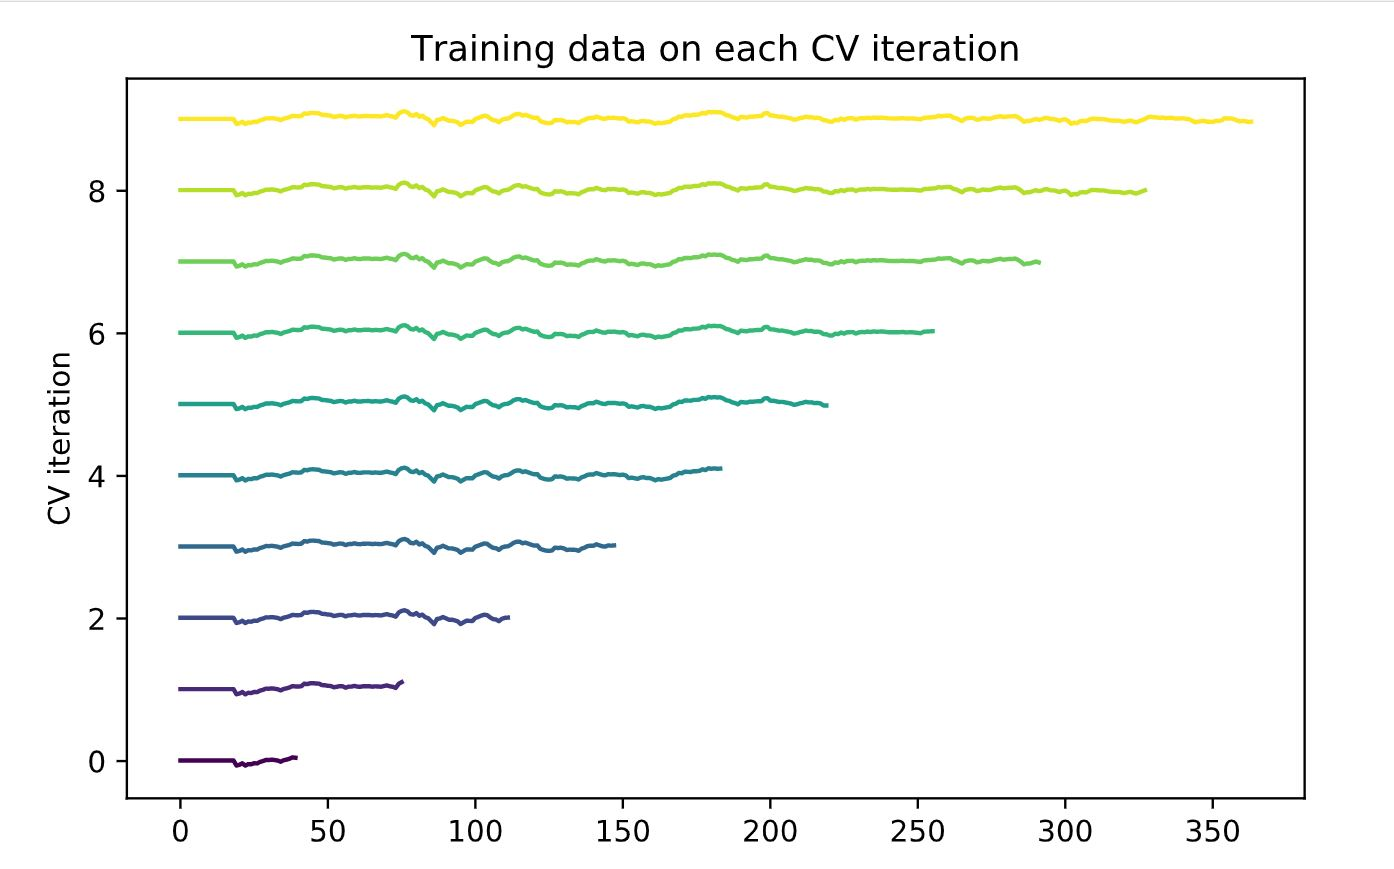

# Bootstrapping a confidence interval
A useful tool for assessing the variability of some data is the bootstrap. In this exercise, you'll write your own bootstrapping function that can be used to return a bootstrapped confidence interval.

This function takes three parameters: a 2-D array of numbers (data), a list of percentiles to calculate (percentiles), and the number of boostrap iterations to use (n_boots). It uses the resample function to generate a bootstrap sample, and then repeats this many times to calculate the confidence interval.

In [245]:
from sklearn.utils import resample

def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # Create empty array to fill the results
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for ii in range(n_boots):
        # Generate random indices for data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis=0)

    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles

In [ ]:
# Iterate through CV splits
n_splits = 100
cv = TimeSeriesSplit(n_splits=n_splits)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X[tr], y[tr])
    coefficients[ii] = model.coef_

In [ ]:
# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3)
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3)
ax.set(title='95% confidence interval for model coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

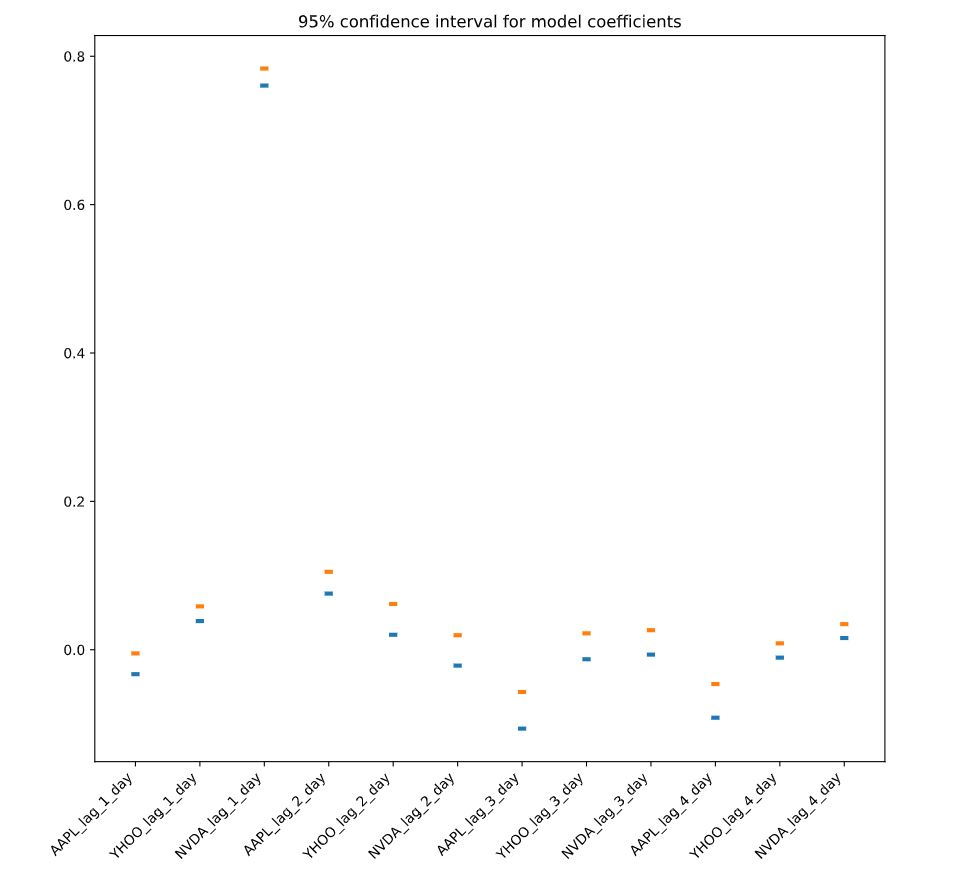

 # Visualizing model score variability over time
Now that you've assessed the variability of each coefficient, let's do the same for the performance (scores) of the model. Recall that the TimeSeriesSplit object will use successively-later indices for each test set. This means that you can treat the scores of your validation as a time series. You can visualize this over time in order to see how the model's performance changes over time.

An instance of the Linear regression model object is stored in model, a cross-validation object in cv, and data in X and y.

In [ ]:
from sklearn.model_selection import cross_val_score

# Generate scores for each split to see how the model performs over time
scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)

# Convert to a Pandas Series object
scores_series = pd.Series(scores, index=times_scores, name='score')

# Bootstrap a rolling confidence interval for the mean score
scores_lo = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=2.5))
scores_hi = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=97.5))

In [ ]:
# Plot the results
fig, ax = plt.subplots()
scores_lo.plot(ax=ax, label="Lower confidence interval")
scores_hi.plot(ax=ax, label="Upper confidence interval")
ax.legend()
plt.show()

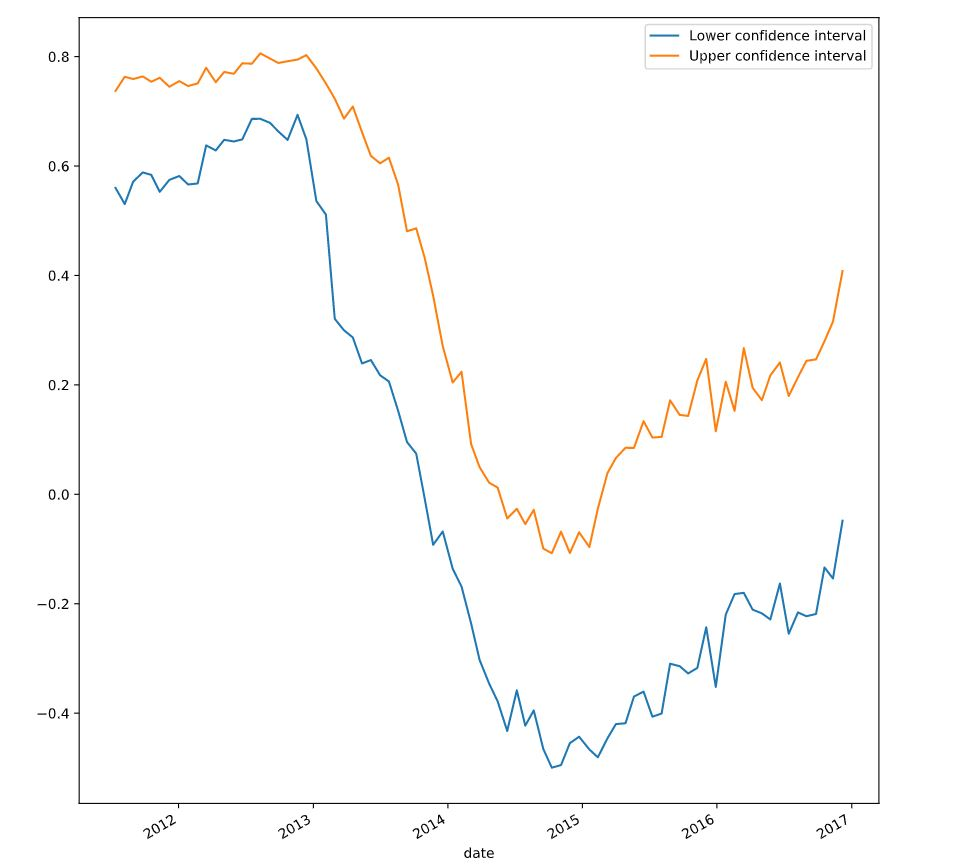

# Accounting for non-stationarity
In this exercise, you will again visualize the variations in model scores, but now for data that changes its statistics over time.

An instance of the Linear regression model object is stored in model, a cross-validation object in cv, and the data in X and y.

In [ ]:
# Pre-initialize window sizes
window_sizes = [25, 50, 75, 100]

# Create an empty DataFrame to collect the stores
all_scores = pd.DataFrame(index=times_scores)

# Generate scores for each split to see how the model performs over time
for window in window_sizes:
    # Create cross-validation object using a limited lookback window
    cv = TimeSeriesSplit(n_splits=100, max_train_size=window)
    
    # Calculate scores across all CV splits and collect them in a DataFrame
    this_scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)
    all_scores['Length {}'.format(window)] = this_scores

In [ ]:
# Visualize the scores
ax = all_scores.rolling(10).mean().plot(cmap=plt.cm.coolwarm)
ax.set(title='Scores for multiple windows', ylabel='Correlation (r)')
plt.show()

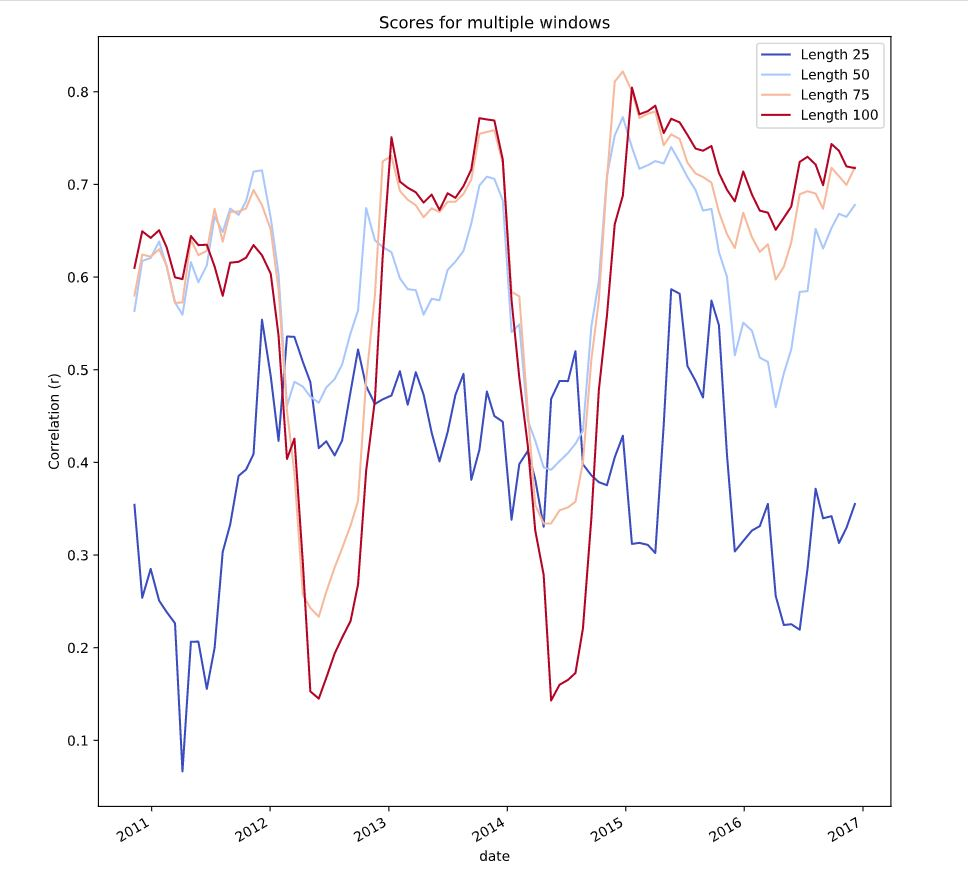